# 1. Basic Configurations

1. Import required packages
2. Loading and create load data set
3. Data understanding

In [126]:
#Importing Required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# 2. Load CSV and creating data frame

In [127]:
# Creating dataframe from loan data file
loan_data = pd.read_csv("./loan/loan.csv")

In [128]:
# Checking and display the data
display(loan_data.shape)
#display first 5 rows
loan_data.head()

(39717, 111)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# 3. Data Cleaning & Manupulation

1. Drop the rows,
    1. If duplicate rows
    2. Removing the rows with loan status 'Current'
2. Remove the columns,
    1. Remove unwanted Columns
    2. If missing value is > 60%
    3. With unique count.


### Finding duplicate rows and remove the same

In [129]:
#Finding duplicate rows
display(loan_data[loan_data.duplicated()].shape)

(0, 111)

**Result: No Duplicates found**

### Removing rows with loan status as current

In [130]:
loan_data.drop(loan_data[loan_data['loan_status'] == 'Current'].index,inplace=True)

In [131]:
display(loan_data.shape)

(38577, 111)

**Rows Reduced to 38577**

### Removing columns which is not required for the analysis["id", "member_id","url", "desc"]

In [132]:
columns_not_required = ["id", "member_id", "url", "desc"]
loan_data.drop(columns=columns_not_required, inplace=True)

In [133]:
loan_data.shape

(38577, 107)

**Columns Reduced to 107**

### Remove columns if missing values > 60%

In [134]:
#Finding null values
miss_val_perc = loan_data.isnull().sum() / len(loan_data) * 100
print(miss_val_perc)

loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 107, dtype: float64


In [135]:
# Find coloumns with more than 60% of data
col_miss_data = miss_val_perc[miss_val_perc > 60].index
print(col_miss_data)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [136]:
# Remove columns with more than 60% of missing data
loan_data = loan_data.drop(columns=col_miss_data)

In [137]:
loan_data.shape

(38577, 50)

**Columns Reduced form 111 to 50**

### Removing columns with unique count as it won't affect the total analysis

In [138]:
##Finding unique columns
unique_columns = loan_data.nunique()
unique_col_to_rem = unique_columns[unique_columns.values == 1]
##These columns will get removed
print(unique_col_to_rem)

pymnt_plan                    1
initial_list_status           1
out_prncp                     1
out_prncp_inv                 1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64


In [139]:
unique_column_list = unique_col_to_rem.index.tolist()
loan_data = loan_data.drop(columns=unique_column_list)

In [140]:
loan_data.shape

(38577, 39)

**Columns Reduced form 111 to 39**

**Data Manupulation & Data Type Changes**

In [141]:
#By looking at the data, divided the columns into their category type
dt_column = ["issue_d"]
cat_columns = ["grade", "sub_grade", "home_ownership", "verification_status", "loan_status", "purpose", "addr_state"]
num_columns= ["funded_amnt", "term", "int_rate", "installment", "emp_length", "annual_inc", "dti", "delinq_2yrs", "inq_last_6mths",
              "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", "total_pymnt", "total_rec_prncp", "total_rec_int",
              "pub_rec_bankruptcies","out_prncp", "out_prncp_inv"]

#sorting the columns
cat_columns.sort()
num_columns.sort()

#Replacing home_ownership to None for Other
loan_data['home_ownership'].replace('NONE', 'OTHER', inplace = True)

In [142]:
#Data type change --Removing percentage and covert to float
percentage_col = ["int_rate", "revol_util"]
for coloumn in percentage_col:
    loan_data[coloumn] = loan_data[coloumn].str.strip('%').astype('float')

In [143]:
#Removing 'Month' from term data
loan_data["term"] = loan_data["term"].apply(lambda x : int(x.split()[0]))

In [144]:
#Updating date format
for col in dt_column:
    loan_data[col] = pd.to_datetime(loan_data[col], format = '%b-%y')

In [145]:
#Converting employee length field with 0-10
emp_length_dict: dict = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10
}

# Replacing values of emp_length column
loan_data['emp_length'] = loan_data['emp_length'].map(emp_length_dict)

In [151]:
#Display the value after updating
loan_data['emp_length']

0        10.0
1         0.0
2        10.0
3        10.0
5         3.0
         ... 
39712     4.0
39713     3.0
39714     0.0
39715     0.0
39716     0.0
Name: emp_length, Length: 38577, dtype: float64

In [146]:
def round_to_nearest_1000(x):
    rounded = round(x / 1000) * 1000
    if rounded >= 1000:
        return f"{rounded // 1000}k"
    else:
        return str(rounded)

In [160]:
def count_plot_with_percentage(ax, data, xcolumn, ycolumn='loan_status', xtick_rotation=None):
    crosstab = pd.crosstab(data[xcolumn], data[ycolumn],margins=True)
    
    #Charged off percentage = chared_off/total (fully paid + charged off count)
    crosstab['charged_off_percentage'] = round(((100*crosstab['Charged Off'])/crosstab['All']),2)
    crosstab = crosstab[0:-1]
    
    linePlot_chargedoff = crosstab[['charged_off_percentage']]
    barPlot =  crosstab.iloc[:,0:2]

    bar = barPlot.plot(kind='bar', ax=ax, stacked=True)
    bar.set_ylabel('Count')
    bar.set_title(f'{xcolumn} vs Loan Status')
    if xtick_rotation:
        bar.set_xticklabels(rotation=xtick_rotation)
    
    line = linePlot_chargedoff.plot(ax=ax, secondary_y=True, marker='*')
    line.set_ylabel('Percentage')
   

In [148]:
# Annual Income category, round of 1000s bucket
bins = np.linspace(loan_data['annual_inc'].min(), 150000, 10)

labels = [f"{round_to_nearest_1000(bins[i])}-{round_to_nearest_1000(bins[i + 1])}" for i in range(len(bins) - 1)]
bins = np.append(bins, np.inf) 
labels=np.append(labels,f'{round_to_nearest_1000(150000)}+') 
loan_data['annual_inc_category'] = pd.cut(loan_data['annual_inc'], bins=bins, labels=labels, right=False)

In [152]:
# Interest rate category
bins = [0, 5, 10, 15, 20, 25]
labels = ['0-5', '5-10','10-15', '15-20', '20-25']
loan_data['int_rate_category'] = pd.cut(loan_data['int_rate'], bins=bins, labels=labels, right=False)

### 4. Data Analysis 

In [153]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                38577 non-null  int64         
 1   funded_amnt              38577 non-null  int64         
 2   funded_amnt_inv          38577 non-null  float64       
 3   term                     38577 non-null  int64         
 4   int_rate                 38577 non-null  float64       
 5   installment              38577 non-null  float64       
 6   grade                    38577 non-null  object        
 7   sub_grade                38577 non-null  object        
 8   emp_title                36191 non-null  object        
 9   emp_length               37544 non-null  float64       
 10  home_ownership           38577 non-null  object        
 11  annual_inc               38577 non-null  float64       
 12  verification_status      38577 non-nu

# 4.1. Univariate Analysis - Charged Off loans

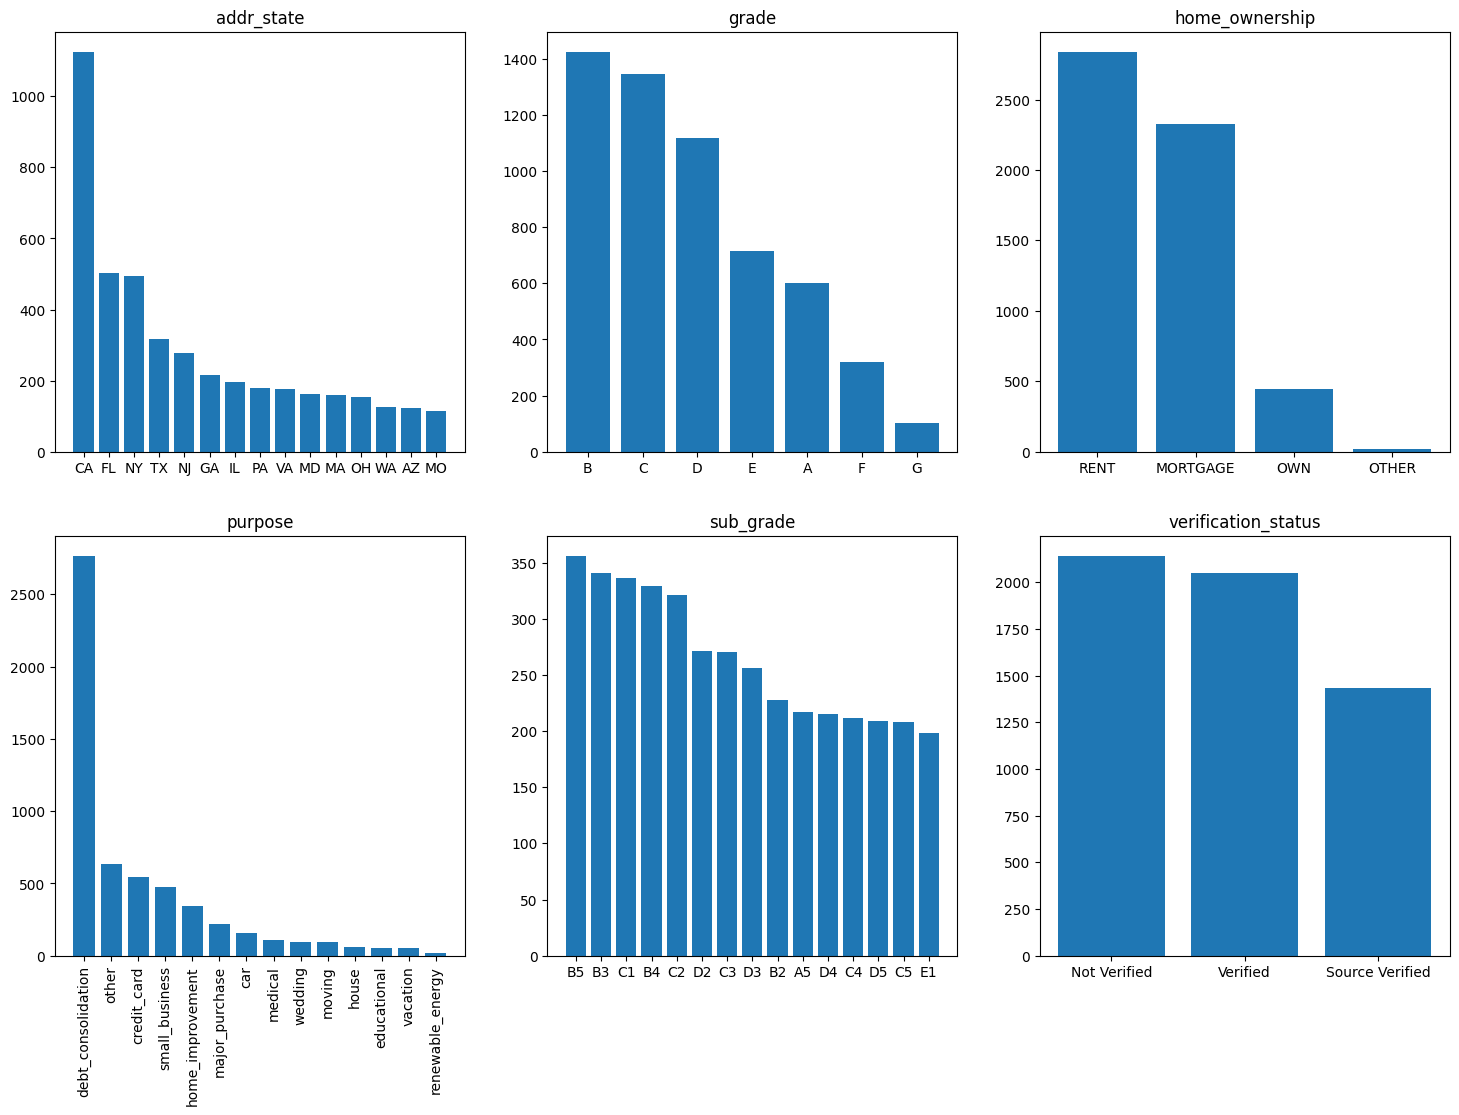

In [159]:
charged_off_loan_data = loan_data[loan_data['loan_status']=='Charged Off']
columns_to_plot=pd.Series(cat_columns)
columns_to_plot = columns_to_plot[~columns_to_plot.isin(['loan_status'])]
nrows=round(np.ceil(len(columns_to_plot)/ncols-1))
fig, ax = plt.subplots(ncols=3,nrows=nrows, figsize=(18, 12))
ax = ax.flatten()
for index, column in enumerate(columns_to_plot):
    df = charged_off_loan_data[column].value_counts()
    # only top 15
    df = df.nlargest(15)
    ax[index].bar(df.index, df.values)
    # Rotating only if the values are larger
    if any(len(str(item)) > 15 for item in df.index):
        ax[index].set_xticklabels(df.index, rotation=90)
    ax[index].set_title(column)
plt.show()

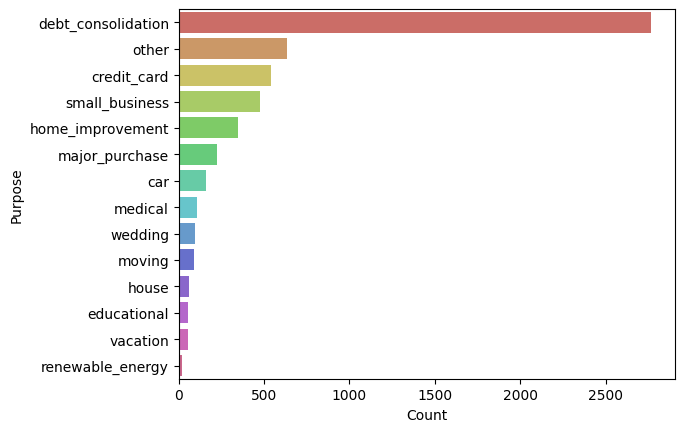

In [155]:
#Resetting the style
plt.rcdefaults()
# graph showing how purpose is impacting the loan charged of
charged_off_loan_data = loan_data[loan_data['loan_status']=='Charged Off']
df = charged_off_loan_data["purpose"].value_counts().reset_index()
df.columns = ['Purpose', 'Count']
colors = sns.color_palette("hls", len(df))
sns.barplot(data=df, x='Count',y='Purpose', palette=colors)
plt.show()

**Result: If the purpose is debt_consolidation, then there is a chance that the loan will be charged off**

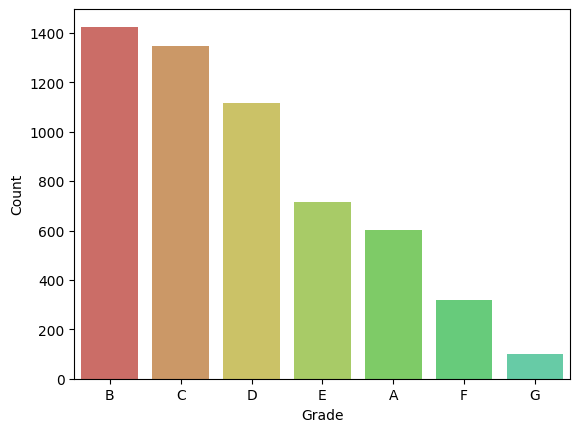

In [156]:
# graph for showing how Grade is impacting the loan charged of
df = charged_off_loan_data["grade"].value_counts().reset_index()
df.columns = ['Grade', 'Count']
sns.barplot(data=df, y='Count', x='Grade', palette=colors)
plt.show()

**Result: Loan will be charged off if the grade is B, C or D**

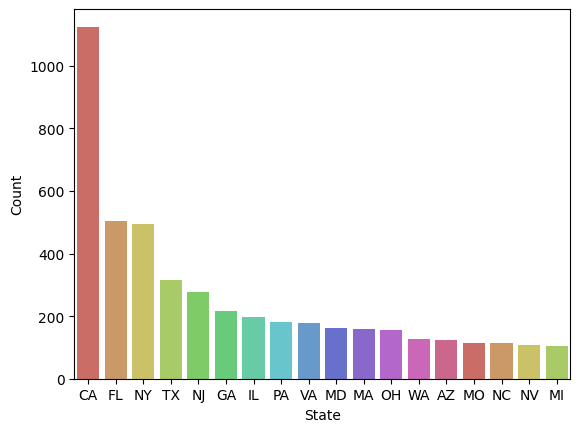

In [157]:
# Customer State vs charged off - plotting bar grarph, x axis is purpose, y axis is count
df = charged_off_loan_data["addr_state"].value_counts()
# Filtering again to plot the graph properly
df = df[df.values>100]
df=df.reset_index()
df.columns = ['State', 'Count']
sns.barplot(data=df, y='Count', x='State', palette=colors)
plt.show()

**Result: Customers residing CA, FL or NY maynot repay the loan.**

# 4.2 Bi-Variate Analysis

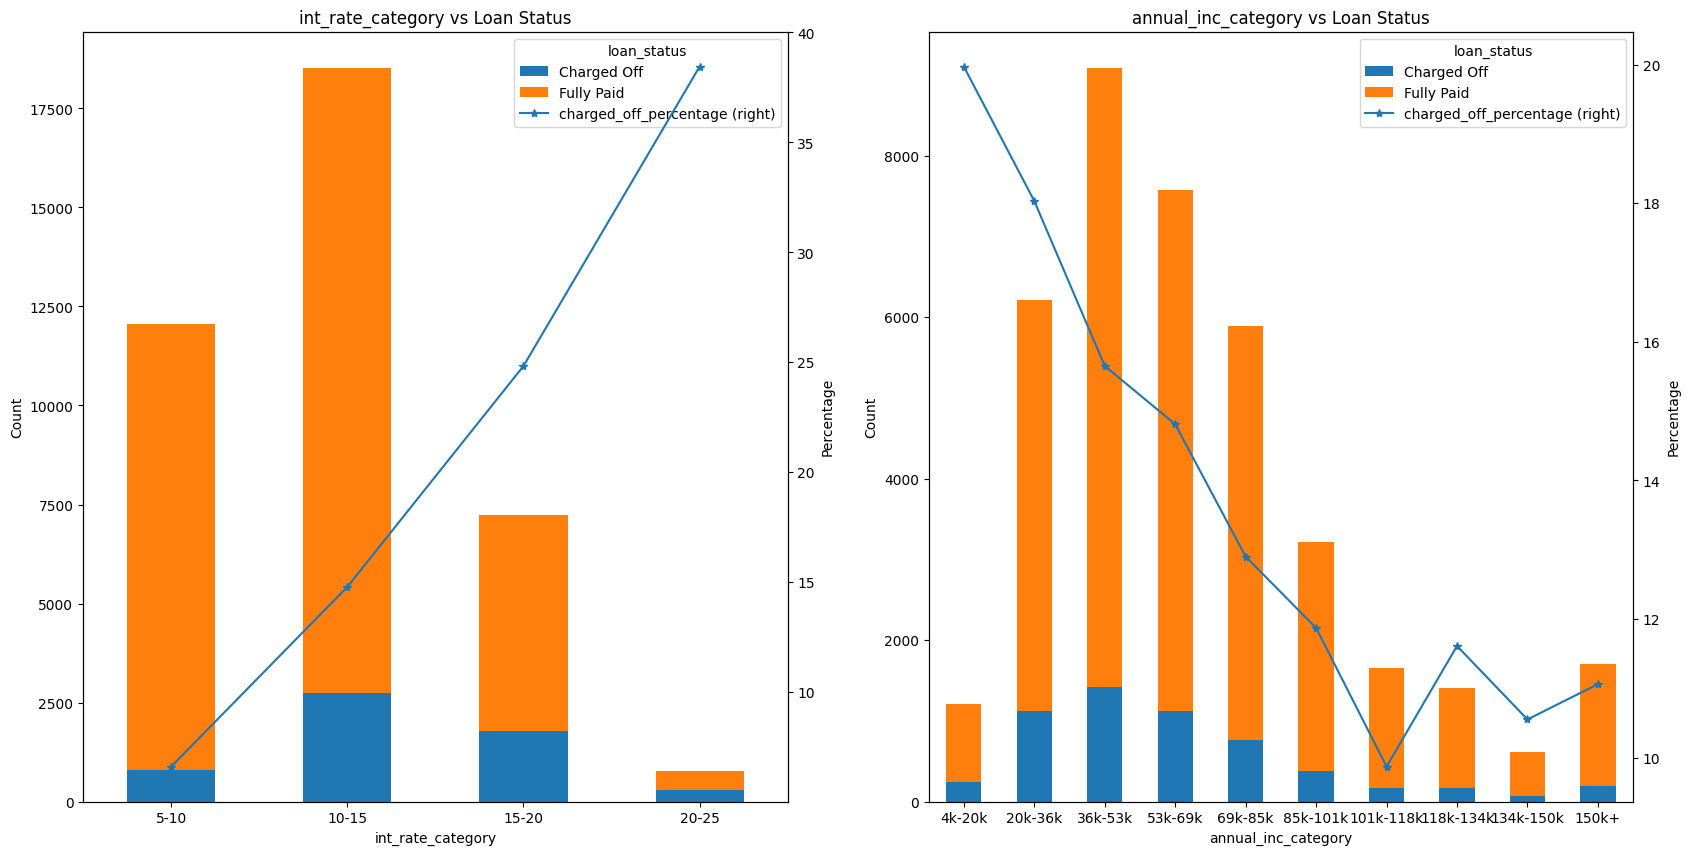

In [161]:
# Graph to show the relation between interest and annual increment to Loan Status
columns_to_plot = ['int_rate_category', 'annual_inc_category']
plt.rcdefaults()
fig, ax = plt.subplots(ncols= 2,nrows=1, figsize=(20, 10))
ax = ax.flatten()
for index, value in enumerate(columns_to_plot):
    count_plot_with_percentage(ax[index], loan_data,
           xcolumn=value)
plt.show()

# Purpose vs Loan Status

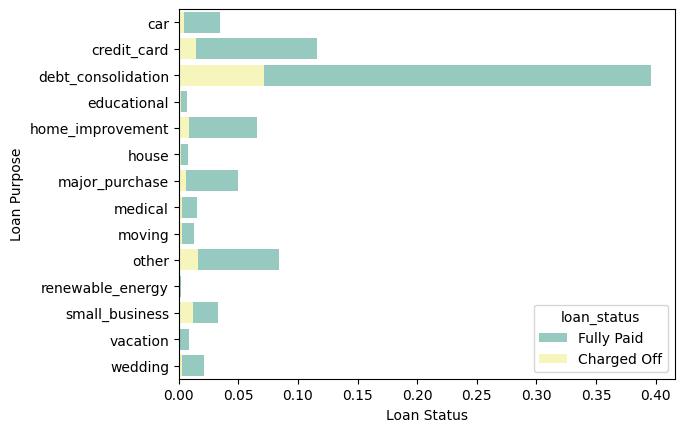

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

In [178]:
sns.countplot(data = loan_data, y = 'purpose', hue = 'loan_status', orient='h', dodge=False,
              order=sorted(loan_data['purpose'].unique()), stat='probability', palette='Set3', color='blue') 
plt.xlabel('Loan Status') 
plt.ylabel('Loan Purpose') 
plt.show() 
plt.figure(figsize=(9,6))

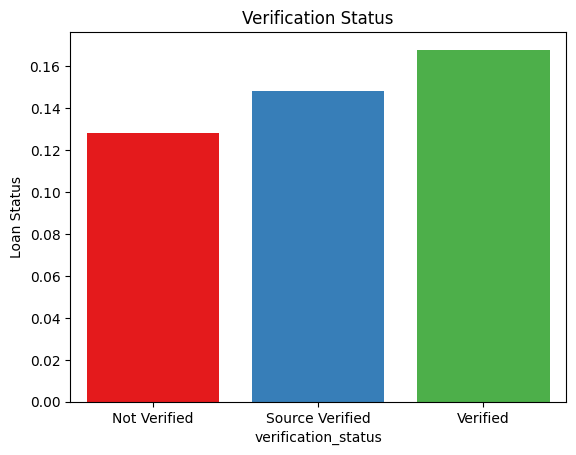

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

In [182]:
default_rates_by_verif_status = loan_data.groupby('verification_status')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values() 
sns.barplot(x=default_rates_by_verif_status.index, y=default_rates_by_verif_status.values, color='skyblue', saturation=1, palette='Set1') 
plt.ylabel('Loan Status') 
plt.title('Verification Status') 
plt.show() 
plt.figure(figsize=(3,3))